
# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [1]:
from tensorflow.keras.datasets import mnist 

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)

Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


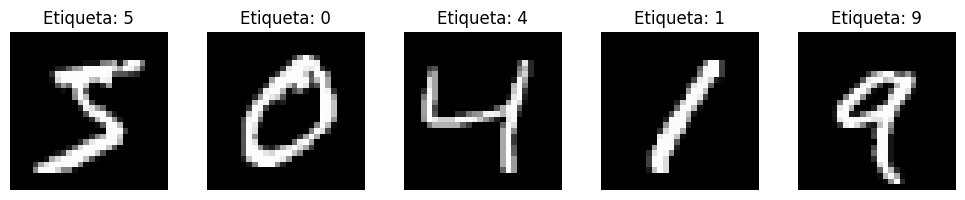

In [2]:
import matplotlib.pyplot as plt

# Visualizar al menos 5 imágenes del dataset con sus etiquetas utilizando matplotlib
plt.figure(figsize=(10, 2))  # ancho, alto del gráfico
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 fila, 5 columnas (1 columna para cada ejemplo), índice del subplot
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')  

plt.tight_layout()
plt.show()


## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:** 
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [3]:
# COMPLETA AQUÍ: Normalización, flattening y codificación one-hot
from tensorflow.keras.utils import to_categorical
# Normalización
x_train = x_train / 255.0
x_test = x_test / 255.0
# Flattening
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
# One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:** 
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [4]:
# COMPLETA AQUÍ: Definición y compilación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Crear un modelo Sequential
model = Sequential([
    Flatten(input_shape=(28*28,)),  # Capa de entrada
    Dense(128, activation='relu'),  # Capa oculta
    Dense(10, activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [5]:
# COMPLETA AQUÍ: Entrenamiento del modelo
from tensorflow.keras.utils import plot_model
model.fit(x_train, y_train, epochs=5, batch_size=32)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8795 - loss: 0.4284
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1212
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0599
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0464
You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [6]:
# COMPLETA AQUÍ: Evaluación del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el set de test: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.0832
Precisión en el set de test: 0.9777


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [7]:
# Usar codificación one-hot para las etiquetas tiene la ventaja de representar cada clase
# como un vector binario sin orden implícito entre categorías. Esto es especialmente útil en
# clasificación con múltiples clases, ya que permite aplicar funciones de pérdida como categorical_crossentropy,
# ayudando al modelo a aprender salidas más precisas y diferenciadas para cada clase.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [8]:
# Si se aumenta el número de neuronas ocultas, el modelo puede aprender representaciones
# más complejas, lo que mejora el desempeño si hay suficientes datos. Sin embargo, esto también
# incrementa el riesgo de sobreajuste y el tiempo de entrenamiento. Por otro lado, disminuir
# las neuronas reduce la capacidad del modelo para capturar patrones, afectando negativamente
# su precisión en tareas más complejas.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [9]:
# Una alternativa al optimizador Adam es el descenso de gradiente estocástico (SGD) con momentum.
# Aunque Adam suele converger más rápido, SGD puede ofrecer una mejor generalización en algunos casos.
# Además, al tener un comportamiento más controlado y predecible, es útil en situaciones donde se desea
# un ajuste más fino de los parámetros de entrenamiento.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [10]:
# Entrenar durante más épocas puede permitir que el modelo aprenda mejor los datos,
# aumentando su precisión en entrenamiento. No obstante, esto también incrementa el riesgo de
# sobreajuste, donde el modelo pierde capacidad de generalizar a datos nuevos, al ajustarse demasiado
# a los patrones específicos del conjunto de entrenamiento.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba es fundamental para evaluar correctamente
# el rendimiento de un modelo. Entrenar y evaluar con los mismos datos no permite medir su capacidad
# de generalización. Al separar los datos, se asegura que el modelo sea probado con ejemplos no vistos,
# simulando cómo se comportará ante datos reales en producción.